# 주식정보 가져오기

2018-06-28
             Close    Open    High     Low    Volume  Change
Date                                                        
2018-06-24  437500  437500  437500  437500       0.0  0.0000
2018-06-25  420500  438000  438500  418000  165000.0 -0.0389
2018-06-26  416000  410000  419000  400500  217020.0 -0.0107
2018-06-27  418000  414500  426500  413000  115660.0  0.0048
2018-06-28  409000  415500  420500  408500       0.0 -0.0215


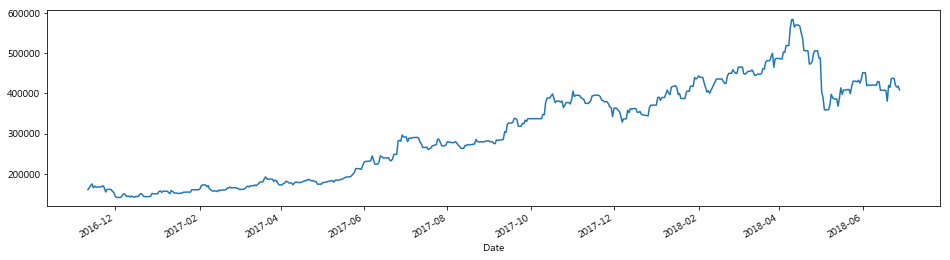

In [2]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
startday = date.today() - timedelta(720)
yesterday = date.today() - timedelta(1)
#startday = '3/14/2014'
#yesterday = '4/14/2016'
print(yesterday)
#GoogleDailyReader??

SEC = web.DataReader("207940", startday, yesterday)
#SEC = web.get_data_yahoo("005930.KS", startday, yesterday)
print(SEC.tail())
SEC['Close'].plot(figsize=(16,4))
plt.show()

## 2018년도 2분기 가격정보 가져오기

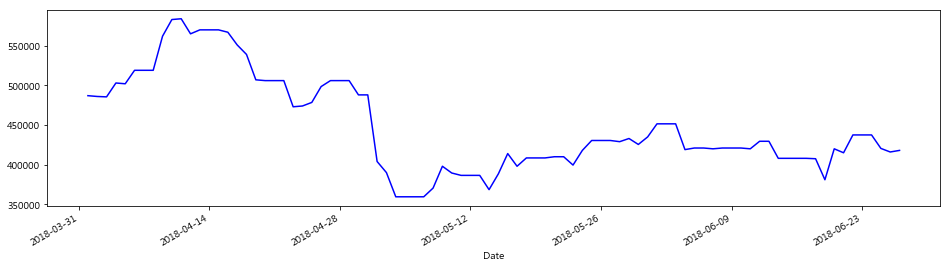

In [4]:
SEC['2018-04-01':'2018-06-27']['Close'].plot(figsize=(16,4), style='b')
plt.show()

## 2018년도 2분기 거래량 정보 가져오기

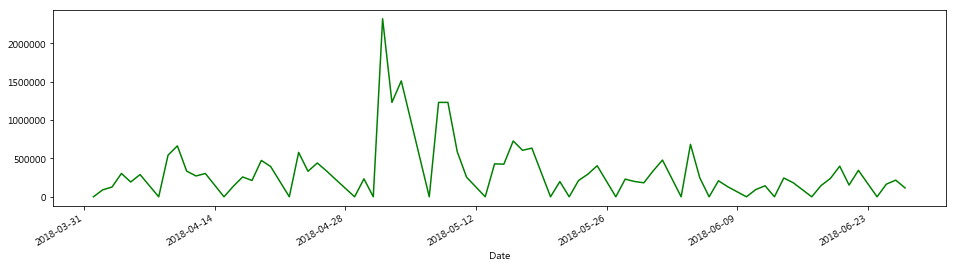

In [6]:
SEC['2018-04-01':'2018-06-27']['Volume'].plot(figsize=(16,4), style='g')
plt.show()

## 수익률 계산 및 변동

In [8]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib inline
plt.figure(figsize=(15,9))
today = date.today()
startday = date(2018,4,1)
endday = date(2018,6,27)
SEC = web.DataReader("207940", startday, endday)
SEC = SEC[SEC['Volume'] != 0]
SEC['Close'].head()

# 1 씩 shift
SEC['Close'].shift(1).head()
# 수익률 계산
SEC['Rate'] = np.log( SEC['Close'].astype(float) / SEC['Close'].shift(1).astype(float))
SEC.head()

,Close,Open,High,Low,Volume,Change,Rate
Date,,,,,,,
2018-04-02,486000,487000,490000,482500,90650.0,-0.0021,NaN
2018-04-03,485500,484000,489500,480000,127370.0,-0.0010,-0.001029
2018-04-04,503000,490000,505000,486000,304040.0,0.0360,0.035411
2018-04-05,502000,501000,505000,496500,192790.0,-0.0020,-0.001990
2018-04-06,519000,509000,534000,508000,289480.0,0.0339,0.033304
